## Liver disease prediction using different classification ml algorithm 

### Problem statement - Determine which patient have liver disease and which ones do not 

### 1. importing libraries

In [1]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#%matplotlibinline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### 2.  Read the data from given dataset 


In [4]:
# Read data from csv file 
df=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:

# so we have to use rename the column names 

In [6]:
# add new column names to df 
df.columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio','Target']


In [7]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.shape


(583, 11)

In [9]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [16]:
# from above 5 columns are int ,5 columns of float type ,1 object column 

In [8]:
df.describe() # only shows numerical columns 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
df.describe(include='O') # categorical column  male are -441 more than females =142

,Gender
count,583
unique,2
top,Male
freq,441


In [11]:
df.dtypes # datatypes of each column 

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object

In [48]:
# check the null values 
df.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [11]:
df.isnull().sum() # only Albumin_and_Globulin_Ratio is   4

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [51]:
df.shape # 11 columns aand 583 rows 0 to 582

(583, 11)

In [17]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Target                          2
dtype: int64

### 3. Exploratory data analysis 
- total number of cloumns 
- check null columns
- check insights 

## UNIVARIATE ANALYSIS - 
- Check each column insight 

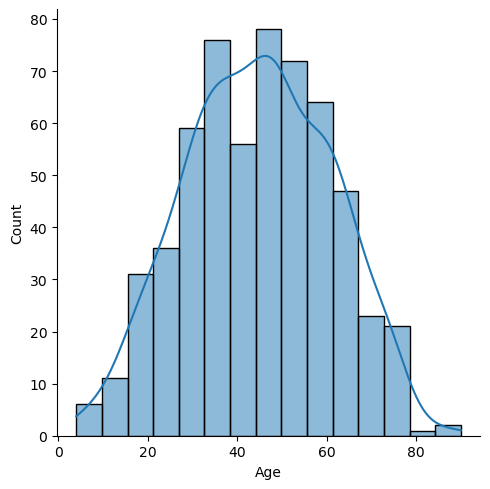

In [8]:
# check age column  
# or u can use plt.hist(df["Age"])
sns.displot(x=df['Age'], data=df,kde=True)
plt.show() # Numerical variables using the histogram function.

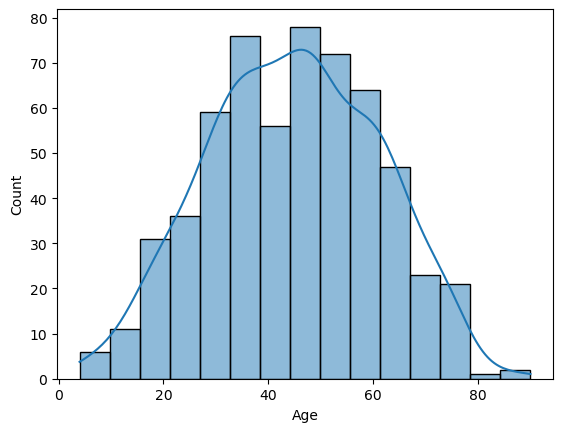

In [13]:
# histogram plot for age column 
sns.histplot(df.Age,kde=True)
plt.show()

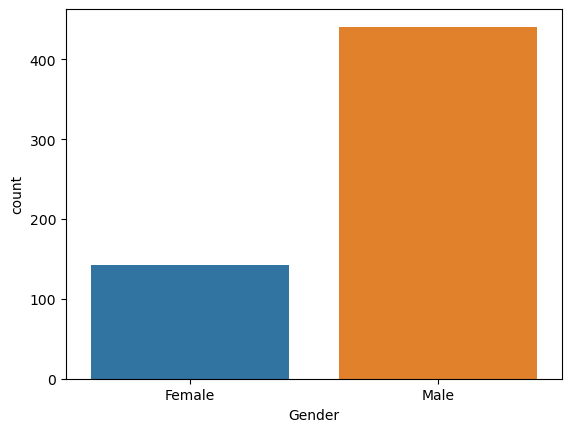

In [14]:
# Univariate Analysis of Categorical Variables -2nd column -gender 
sns.countplot(df.Gender)
plt.show()#  Univariate analysis of categorical data. We’ll be using the count plot function from the seaborn library

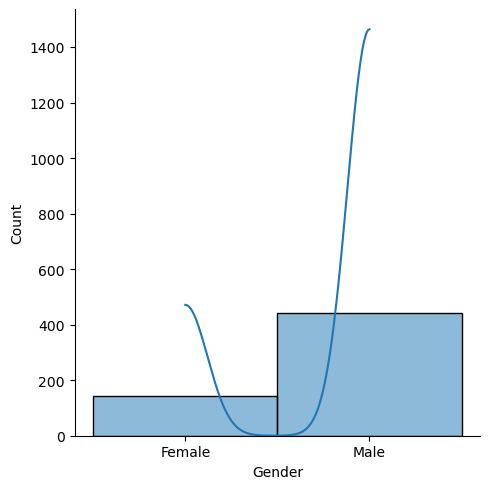

In [44]:
sns.displot(x=df['Gender'], data=df,kde=True)
plt.show()

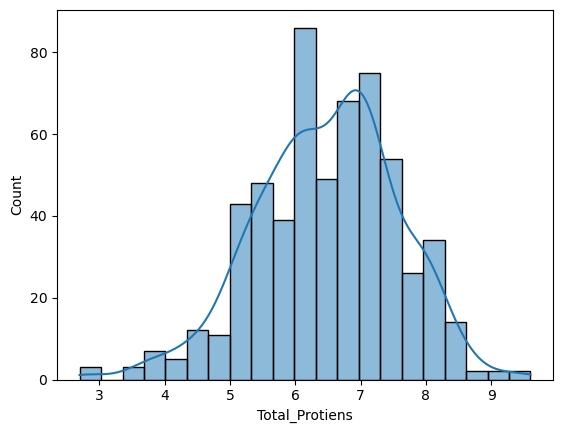

In [11]:
sns.histplot(x=df['Total_Protiens'], data=df,kde=True)
plt.show()  #  plot 7th column normaly distribvuted not fully 


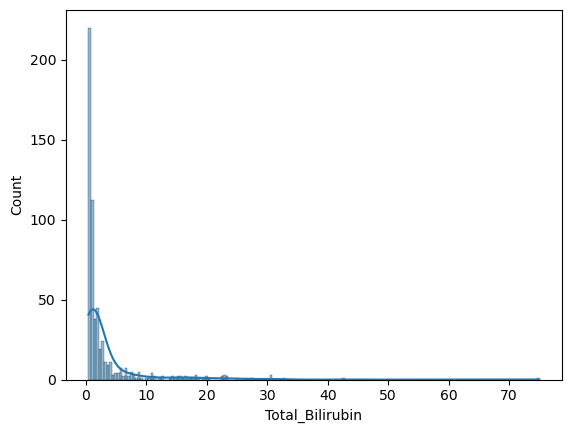

In [13]:
 sns.histplot(x=df['Total_Bilirubin'], data=df,kde=True)
 plt.show()  # how will plot 3rd column   right skewed  

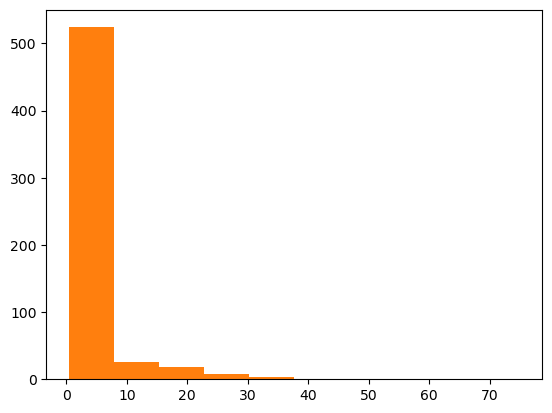

In [19]:
plt.hist(df['Total_Bilirubin'])
plt.show()

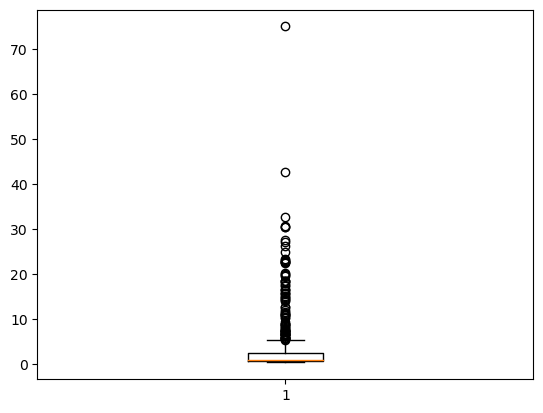

In [8]:
# boxplot : 
plt.boxplot(df['Total_Bilirubin'])
plt.show()

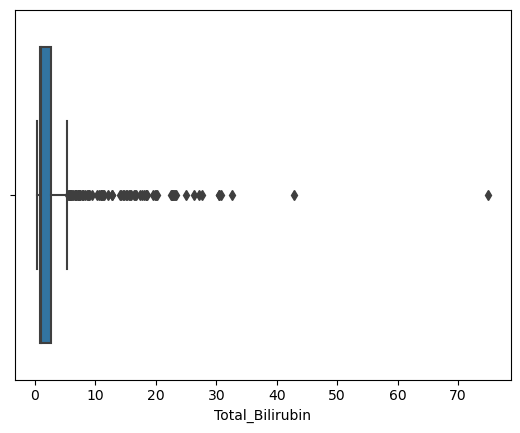

In [9]:
sns.boxplot(df['Total_Bilirubin'])
plt.show()

<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Count'>

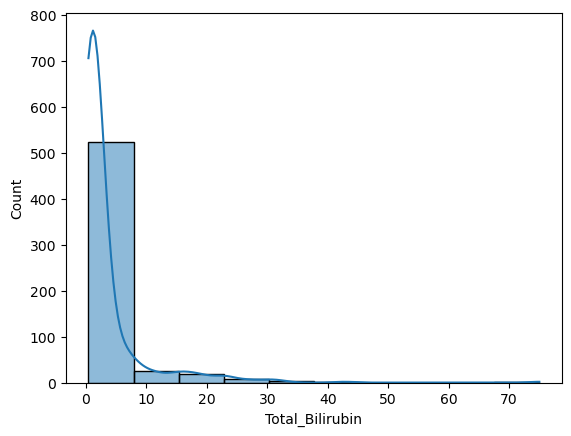

In [15]:
sns.histplot(df['Total_Bilirubin'],bins=10,kde=True)

<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

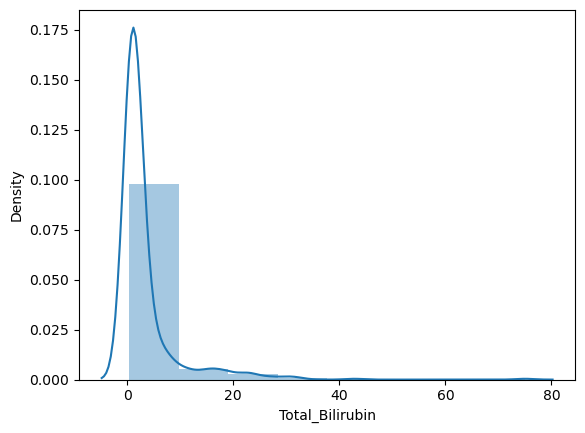

In [19]:
sns.distplot(df['Total_Bilirubin'],bins=8,kde=True)

<AxesSubplot:xlabel='Direct_Bilirubin', ylabel='Density'>

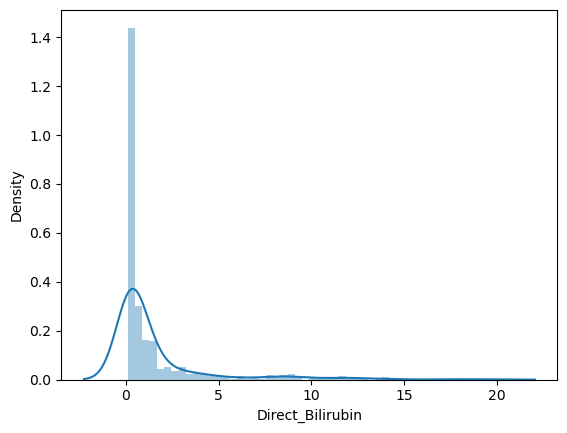

In [23]:
# 4th columns 
sns.distplot(df['Direct_Bilirubin'])

<AxesSubplot:xlabel='Direct_Bilirubin', ylabel='Density'>

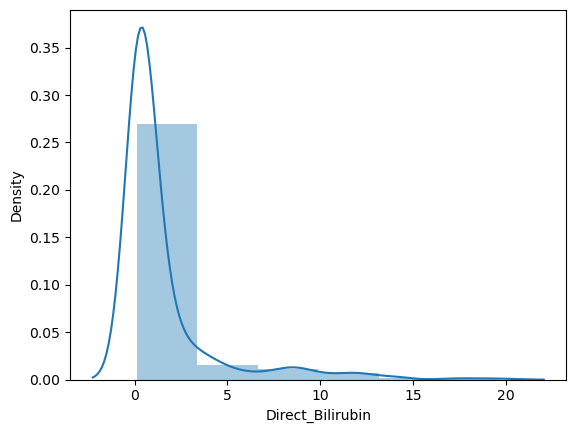

In [25]:
sns.distplot(df['Direct_Bilirubin'],bins=6)

<AxesSubplot:xlabel='Alkaline_Phosphotase', ylabel='Density'>

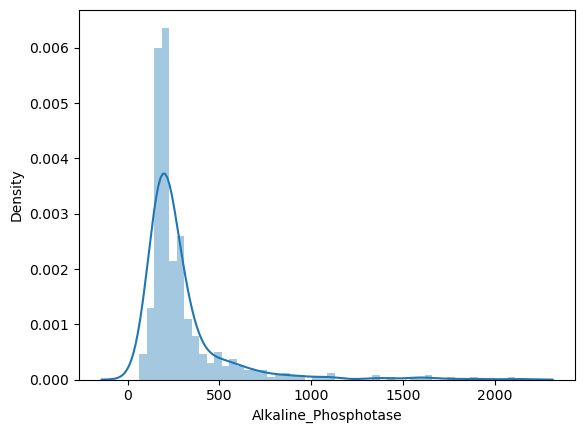

In [14]:
# 5th column 
# Alkaline_Phosphotase right skewed 
sns.distplot(df['Alkaline_Phosphotase'],kde=True)

In [31]:
y=df['Alkaline_Phosphotase'].value_counts()
y

198    11
215    11
298    11
195    10
190    10
       ..
335     1
505     1
228     1
247     1
184     1
Name: Alkaline_Phosphotase, Length: 263, dtype: int64

<AxesSubplot:xlabel='Alamine_Aminotransferase', ylabel='Density'>

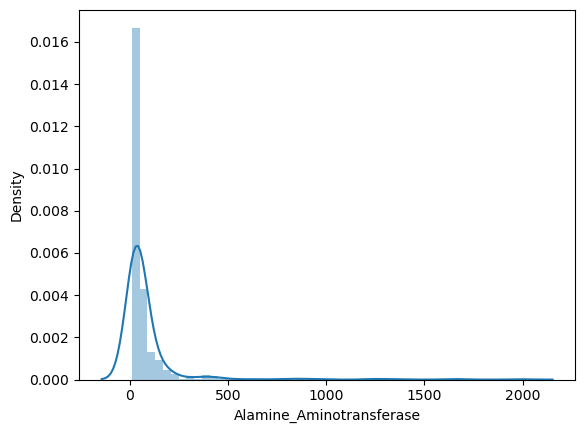

In [16]:
# 6th couln  Alamine_Aminotransferase
sns.distplot(df['Alamine_Aminotransferase'],bins=50,kde=True)

<AxesSubplot:xlabel='Aspartate_Aminotransferase', ylabel='Density'>

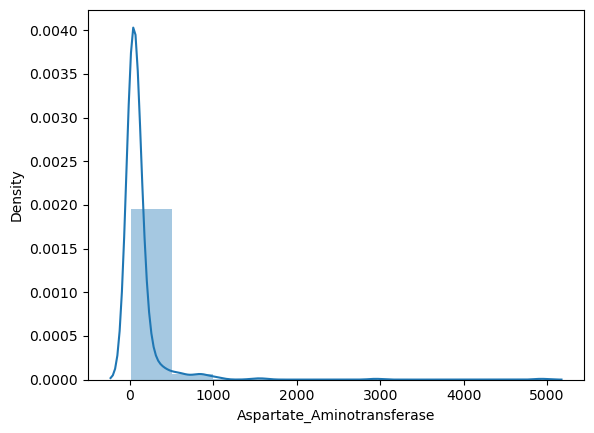

In [17]:
# 7th column Aspartate_Aminotransferase
sns.distplot(df['Aspartate_Aminotransferase'],bins=10,kde=True)

<AxesSubplot:xlabel='Total_Protiens', ylabel='Density'>

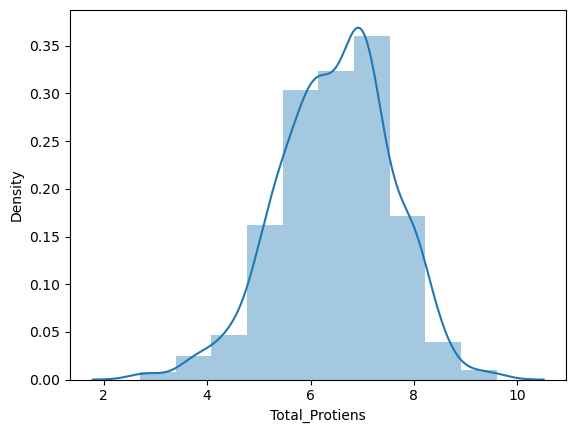

In [48]:
# 8th column Total_Protiens
sns.distplot(df['Total_Protiens'],bins=10,kde=True)

<AxesSubplot:xlabel='Total_Protiens', ylabel='Count'>

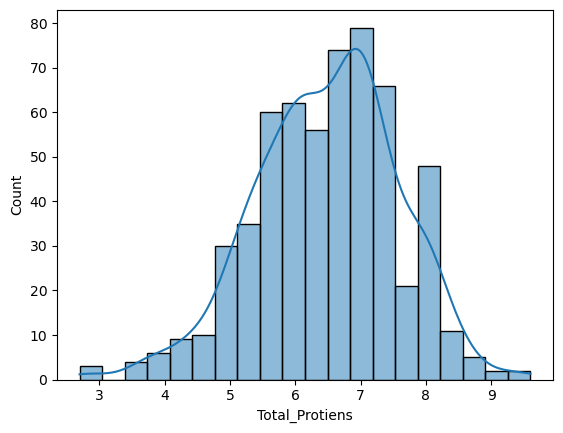

In [18]:
sns.histplot(df['Total_Protiens'],bins=20,kde=True)

<AxesSubplot:xlabel='Albumin', ylabel='Count'>

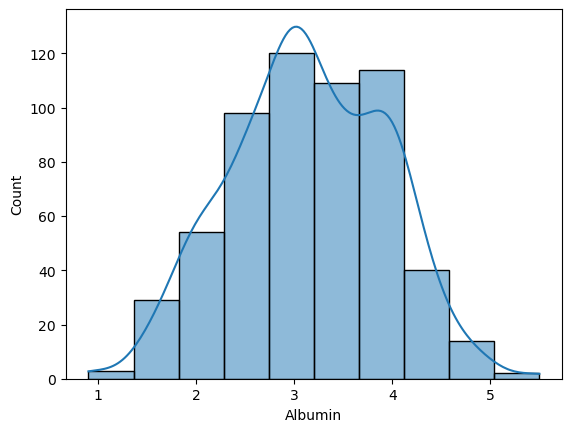

In [19]:
# 9th column  normaly distributed 
sns.histplot(df['Albumin'],bins=10,kde=True)

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio', ylabel='Count'>

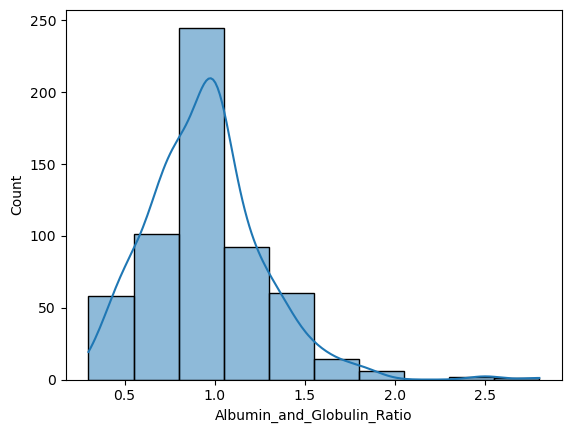

In [20]:
# 10 rth column -	Albumin_and_Globulin_Ratio 
sns.histplot(df['Albumin_and_Globulin_Ratio'],bins=10,kde=True) # little right skewed 

In [61]:
# insight Albumin_and_Globulin_Ratio  1 has more more no.of counts 300 


<AxesSubplot:xlabel='Target', ylabel='Count'>

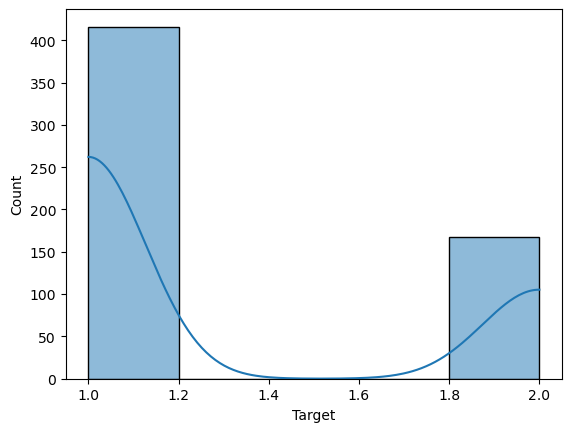

In [62]:
# last column target 11 th no. column 
sns.histplot(df['Target'],bins=5,kde=True)

<AxesSubplot:xlabel='Target', ylabel='count'>

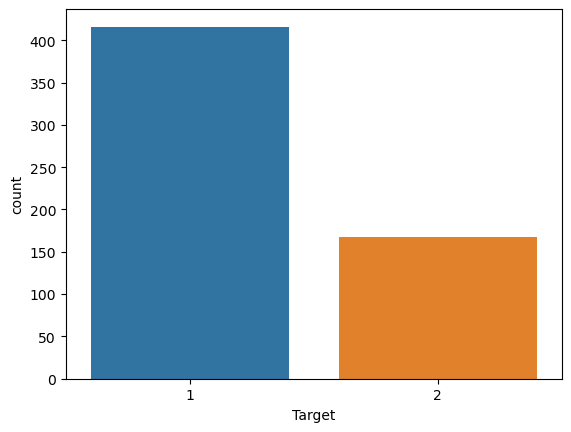

In [63]:
sns.countplot(df['Target'])

In [27]:
#insight  more no. of  patient has disease and less no. of patient has no disease 


<AxesSubplot:ylabel='Gender'>

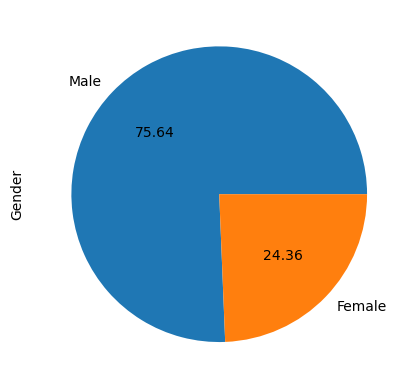

In [21]:
# pie chart for categorical variable .ie gender 
df["Gender"].value_counts().plot(kind='pie',autopct='%.2f')

In [30]:
# gender male are 75.64 % and females count% is 24.36 
# means females are lesss than males

### Bivariate Analysis
### relationship between 2 variables
- categorical vs numercial
-num vs num
- cat vs cat 

#### age and gender 
###  In bivaraite analysis mostly x is indepedent varaible vs y is target variable 



In [26]:
# age vs gender  - categorical vs numerical 
# so use boxplot, barplot ,stripplot  ,distplot 

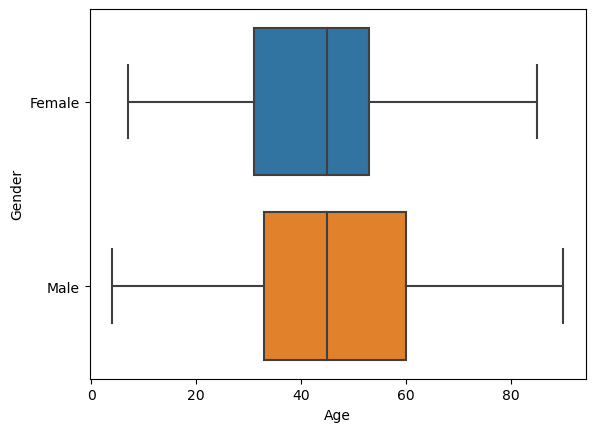

In [33]:
# box plot age vs gender
sns.boxplot(x=df['Age'],y=df['Gender'])
plt.show()

In [34]:
# no outliers in female and male 

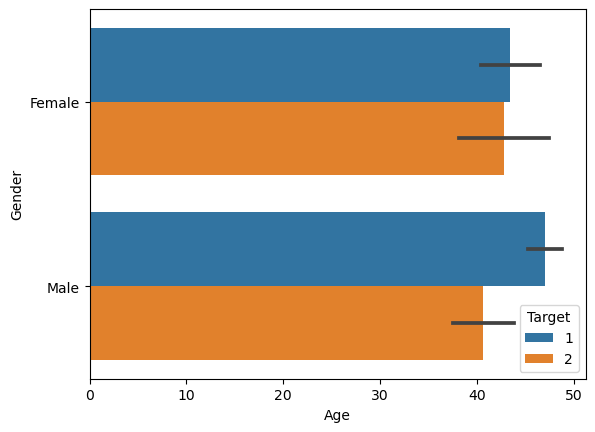

In [37]:
# barplot age vs gender
sns.barplot(df['Age'],df['Gender'],hue=df['Target'])
plt.show()

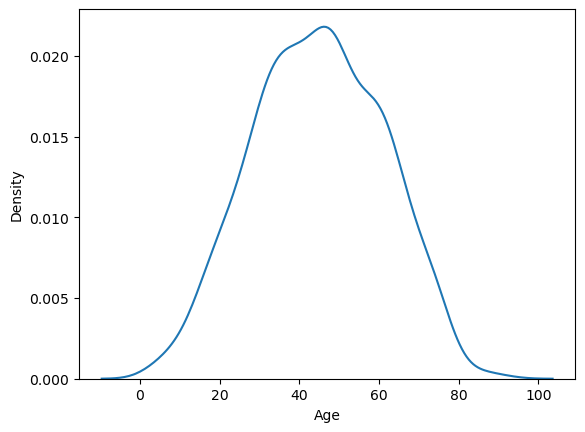

In [39]:
# distplot numerical vs categorical 
sns.distplot(df['Age'],df['Gender'],hist=False)
plt.show()

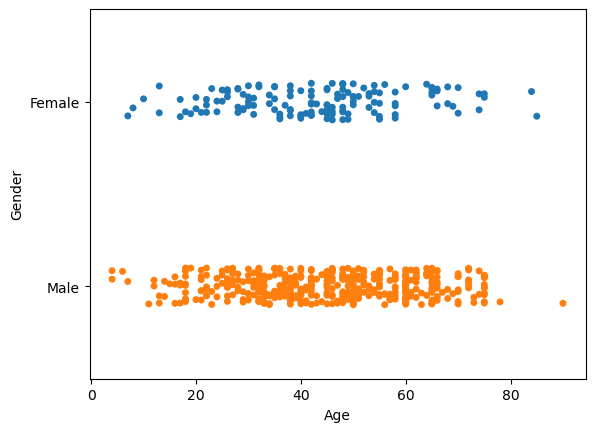

In [43]:
# strip plot 
sns.stripplot(df['Age'],df['Gender'])
plt.show()

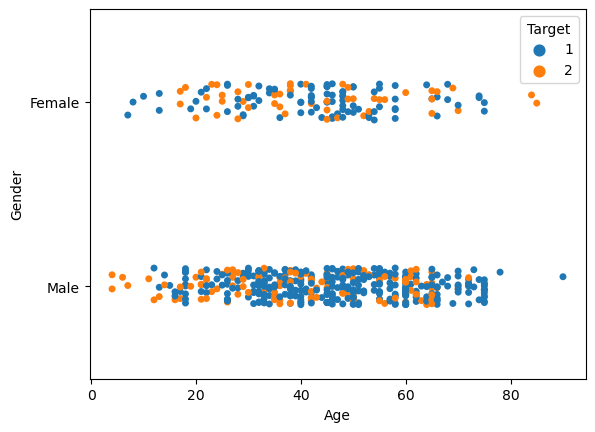

In [44]:
sns.stripplot(df['Age'],df['Gender'],hue=df['Target'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

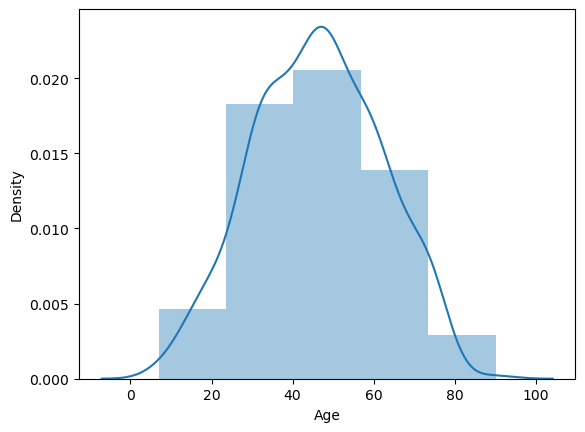

In [25]:
sns.distplot(df[df['Target']==1]['Age'],bins=5)

In [19]:
# =insight age vs target using distplot age 40 to 60 more patients have liver diseases,50 age person more liver diseases 

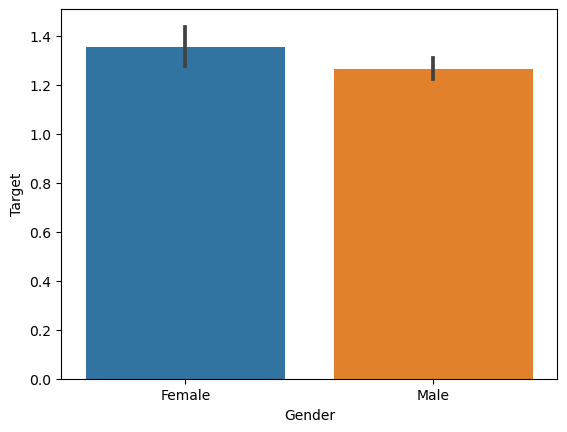

In [36]:
# gender vs target
sns.barplot(df['Gender'],df['Target'])
plt.show()

In [ ]:
# gender vs target - female more diseases than male 

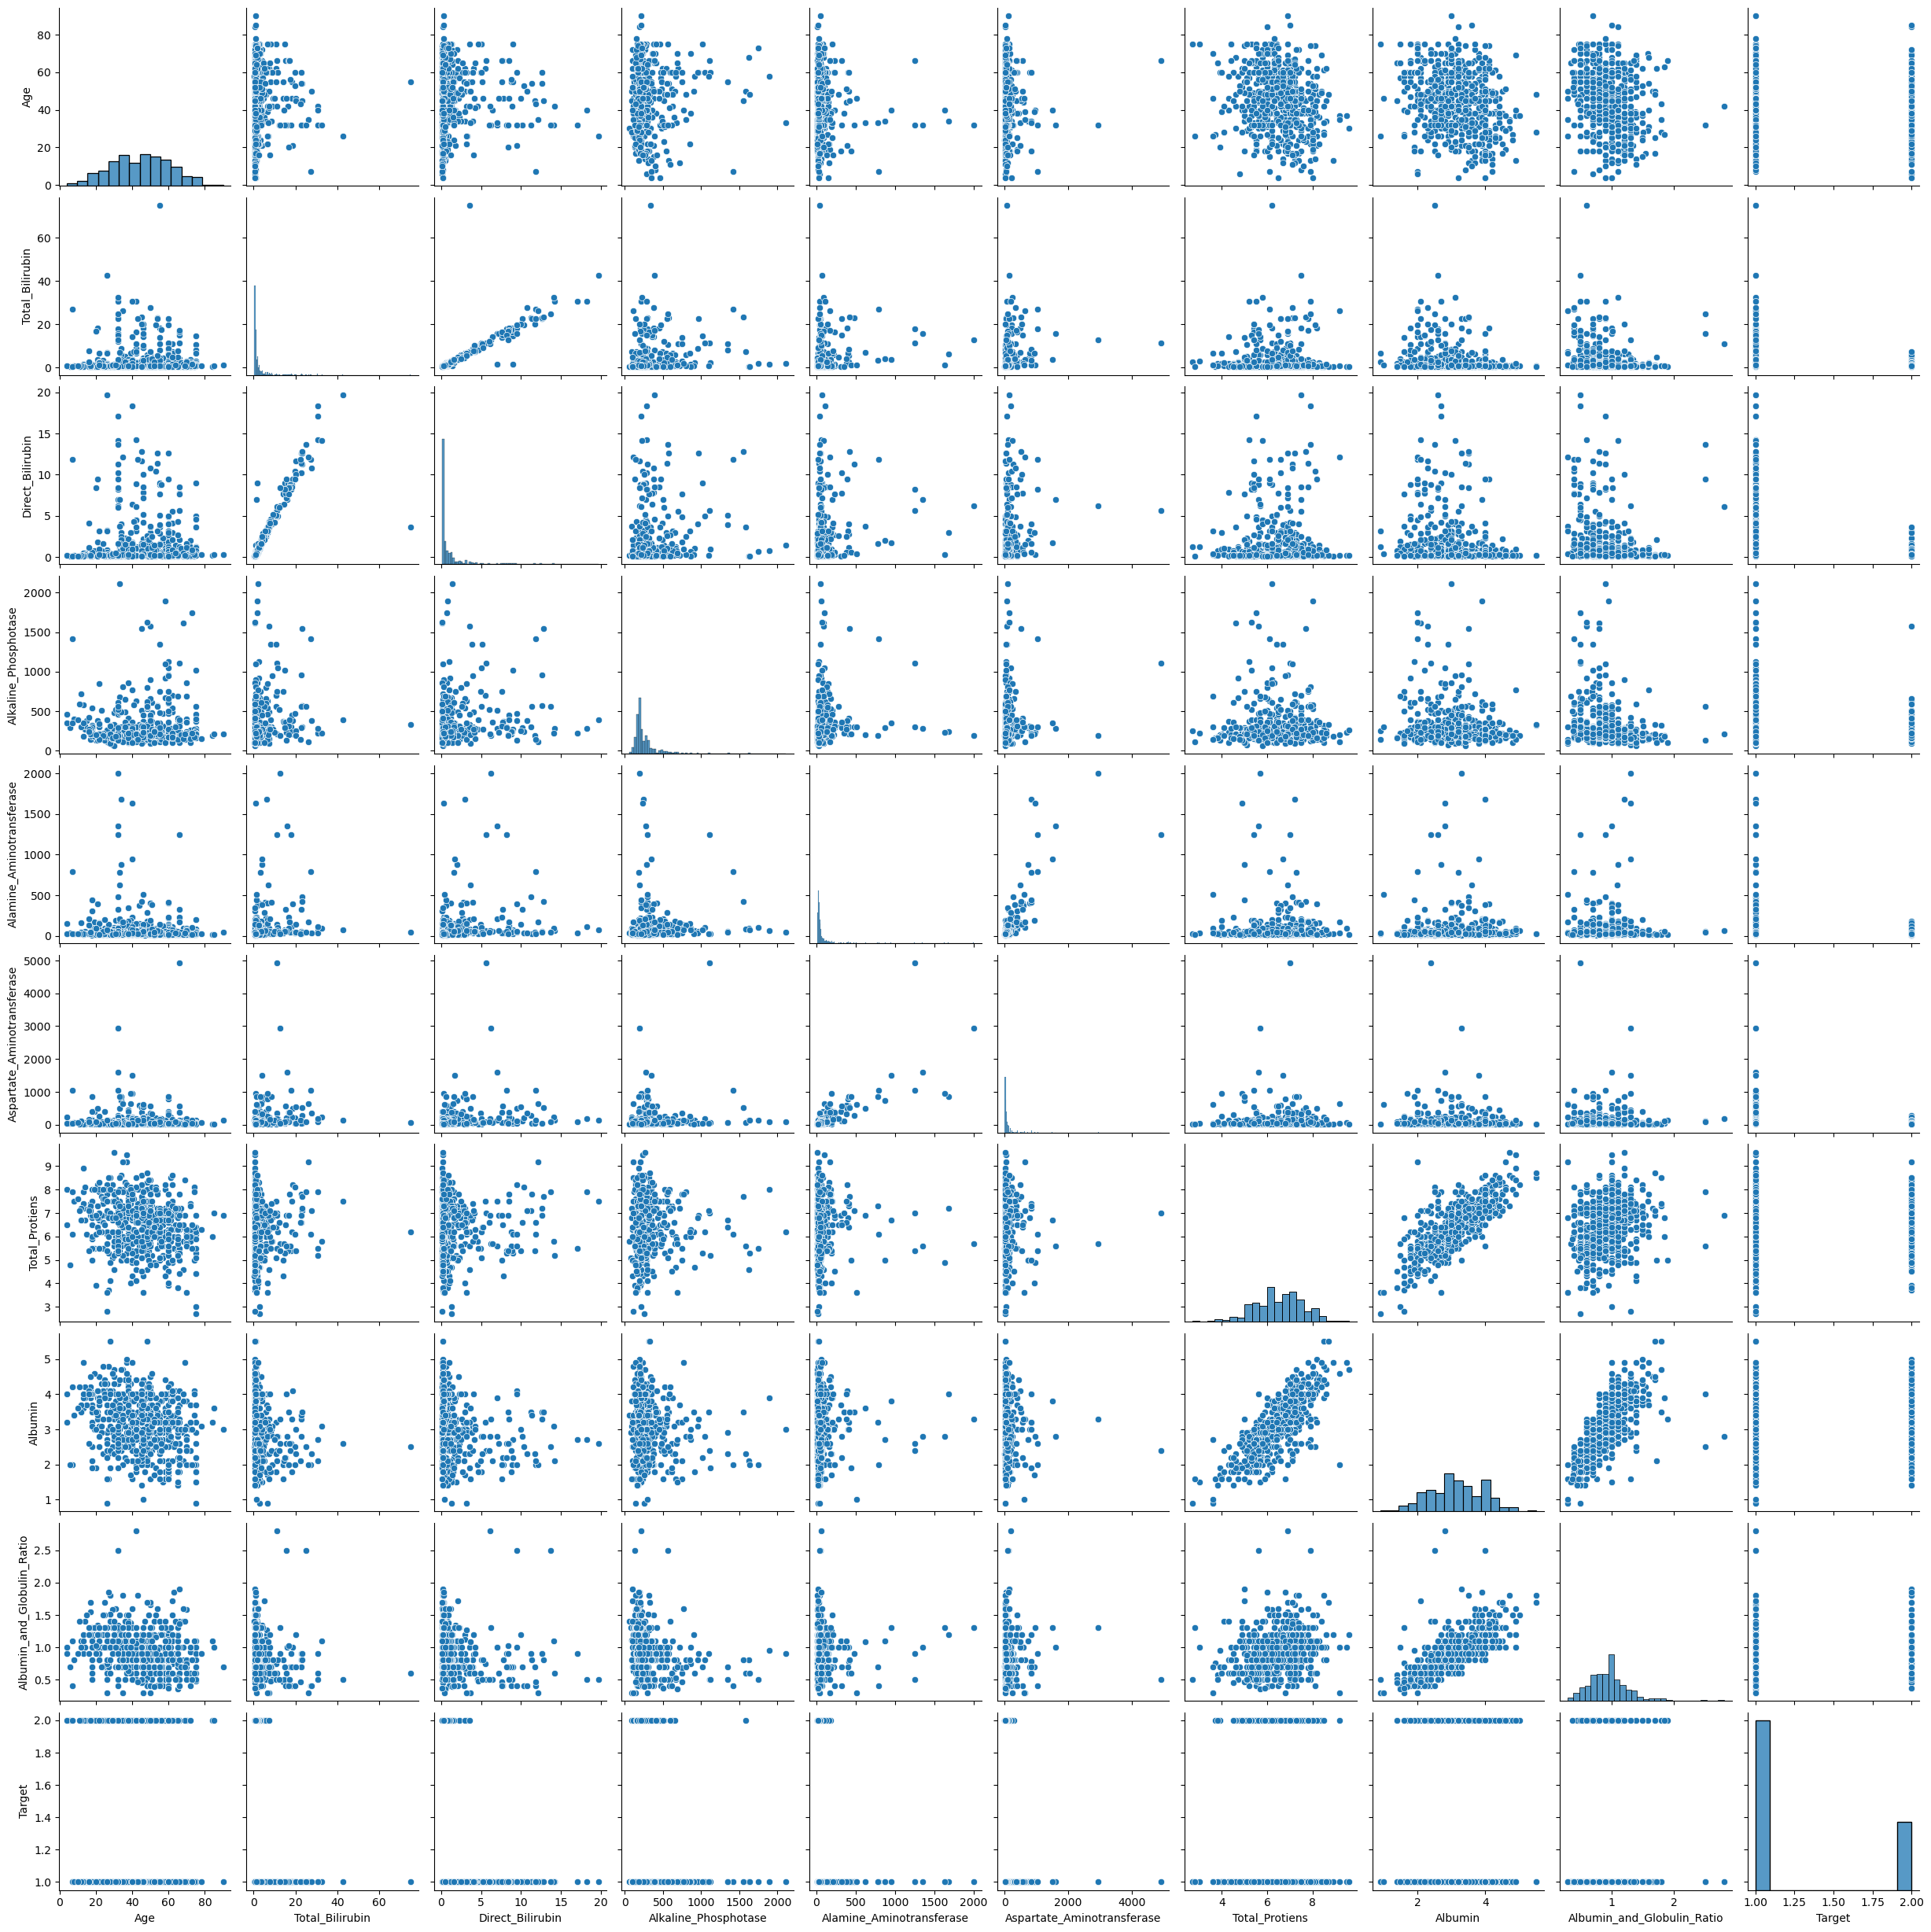

In [42]:
sns.pairplot(df)
plt.show()

In [12]:
# FILTERING CATEGORICAL DATA
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

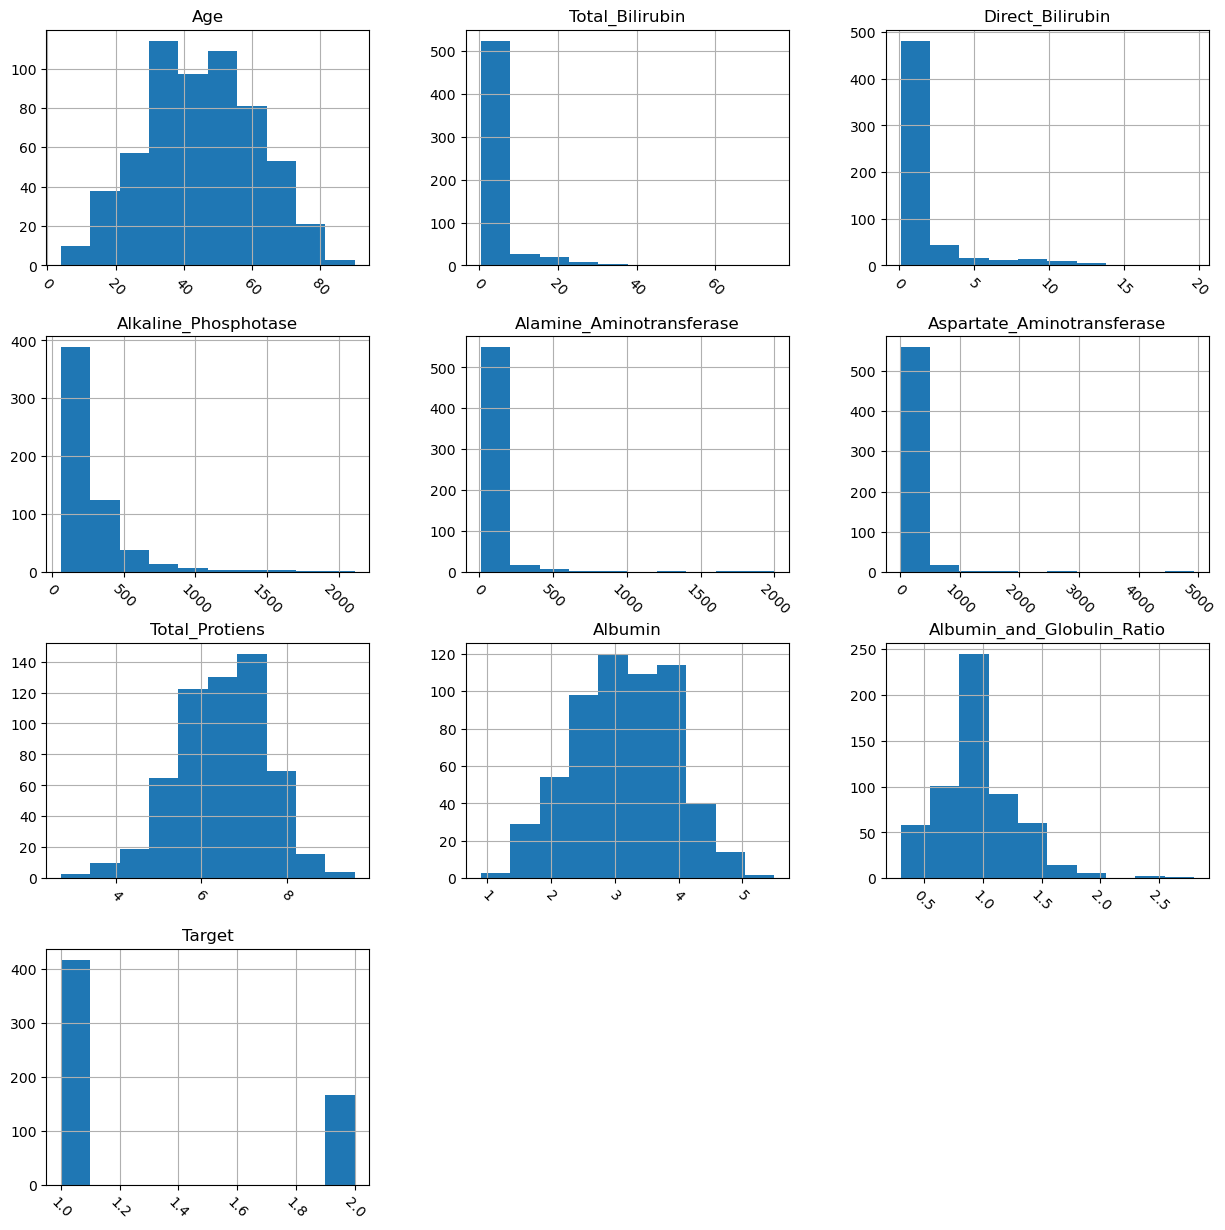

In [23]:
# DISTRIBUTIUTION OF NUMERICAL FEATURES 
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress
plt.show()


In [24]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [13]:
### Correlations- num vs num variables 
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Target,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


<AxesSubplot:>

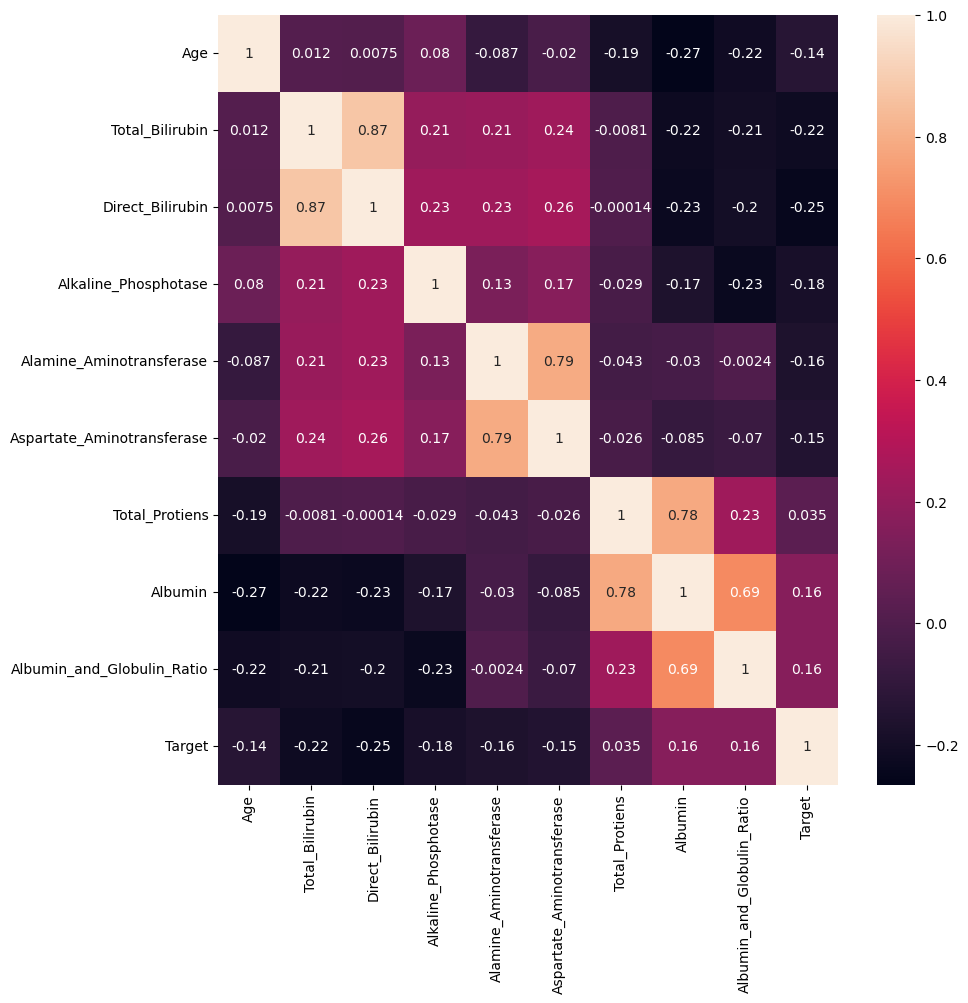

In [26]:
# using heatmap find numerical relationship  .
# this heatmap shows all varaible relationship with target also 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### 4. Data Prerocessing
- Checking duplicates
- removing outliers 
- convert object into numerical value 
- scaling using standard scaler or minmax scaler 
- 

In [52]:
df.shape

(583, 11)

In [14]:
# Duplicates 
df.duplicated

<bound method DataFrame.duplicated of      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspart

#### DROP DUPLICATES 

In [15]:
# drop duplicates
df = df.drop_duplicates()
print( df.shape )

(570, 11)


In [16]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [57]:
# there are 13 outilers 583- 570=13

### Remove missing values /replace missing values


In [17]:
#checking if there are any NULL values in our Dataset df 
df.isnull().values.any()

True

In [18]:
df.isnull().sum() # check first missing values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [19]:
df['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [23]:
df['Albumin_and_Globulin_Ratio']= df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [24]:
df['Albumin_and_Globulin_Ratio'].isnull().sum() # REMOVE THE ALL MISSING VALUES 

0

In [25]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [26]:
# again check shape 
df.shape

(570, 11)

### ENCODING -Convert  Categorical feature  into Numerical


In [27]:
# USE LABEL ENCODER 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [28]:
df # male as 0 and female as 1 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [29]:
new_data=df.dropna(axis = 0, how ='any')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    int32  
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Target                      570 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 51.2 KB


In [31]:
new_data.isnull().values.any() # check any value is missing of any column so false means no value 

False

#### map  target feature reaplcing 2 and 1 with  0 and 1 : 
- 0 = no disease , 1 =disease 

In [32]:
# transform output i.e Target column into replace value  2 and 1 with 0 and 1  with map function 
# transform Selector
df['Target'] = df['Target'].map({2:0, 1:1}) # 2=0 & 1= 1 set  
# means 0 is no disease patient and 1 means disease patients 

In [33]:
df = df.dropna(how = 'any', axis = 0)

In [34]:
df.Target.isnull().sum()

0

#### Removing outliers 
- Outlier Detection & Removal 

In [ ]:
# checking the outliers 

<AxesSubplot:>

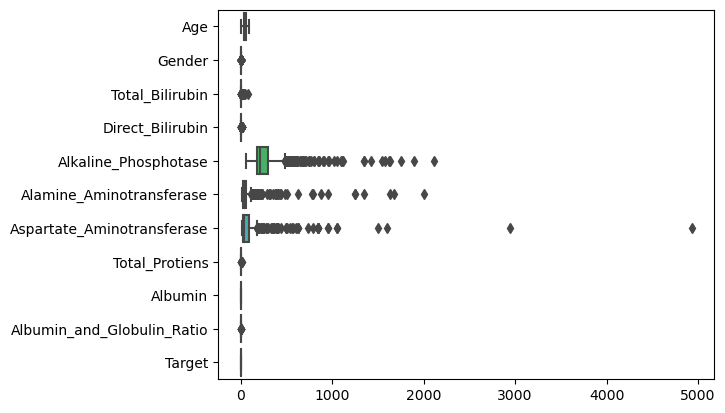

In [36]:
sns.boxplot(data=df,orient="h")

<AxesSubplot:>

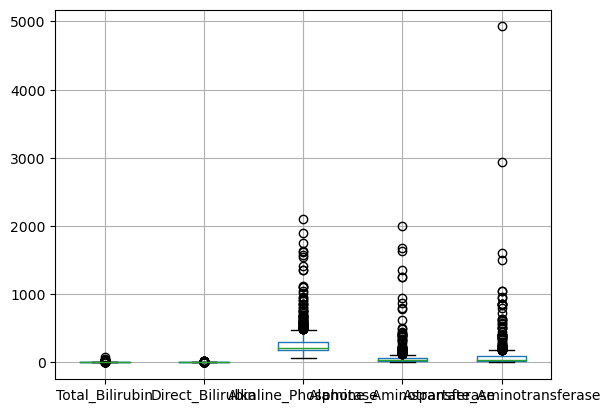

In [26]:
df.boxplot(column = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase'])

<AxesSubplot:xlabel='Total_Bilirubin'>

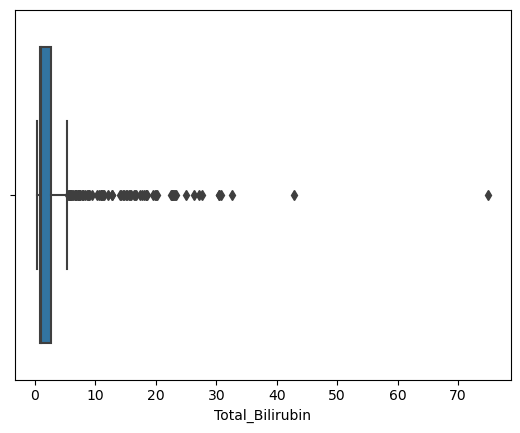

In [60]:
# check seperately outlierrs to plot each boxplot 
sns.boxplot(df.Total_Bilirubin) # max value is outlier greater than 10 

<AxesSubplot:xlabel='Direct_Bilirubin'>

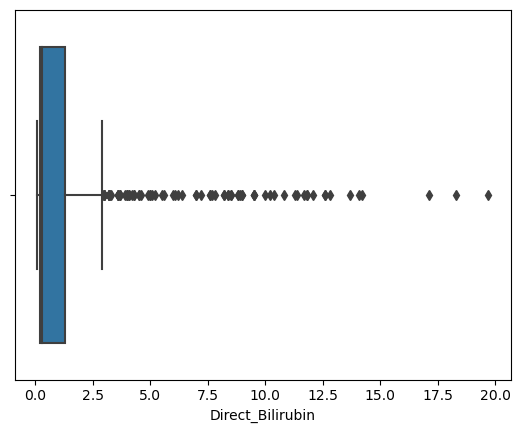

In [61]:
sns.boxplot(df.Direct_Bilirubin) # max outliers greter than 2.5 to 20 

<AxesSubplot:xlabel='Alkaline_Phosphotase'>

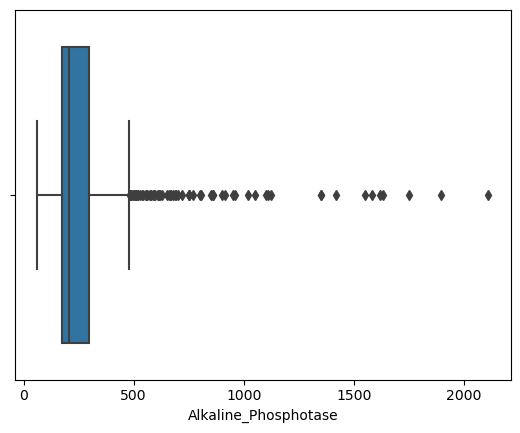

In [63]:
sns.boxplot(df.Alkaline_Phosphotase)# max outliers gtrert than 500 to 2000

<AxesSubplot:xlabel='Alamine_Aminotransferase'>

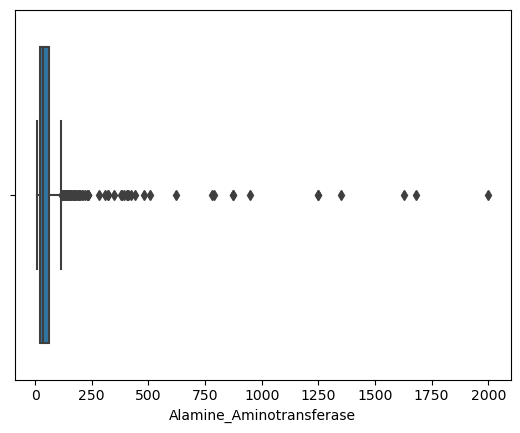

In [66]:
sns.boxplot(df.Alamine_Aminotransferase) # max outliers gtrert than  1832 to 2000

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

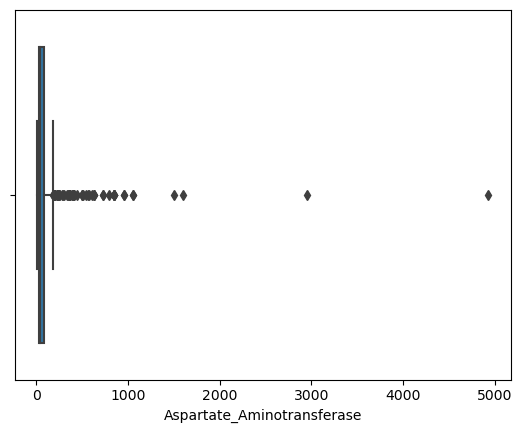

In [67]:
sns.boxplot(df.Aspartate_Aminotransferase)  # max outliers-  gtrert than  10 to 5000

<AxesSubplot:xlabel='Total_Protiens'>

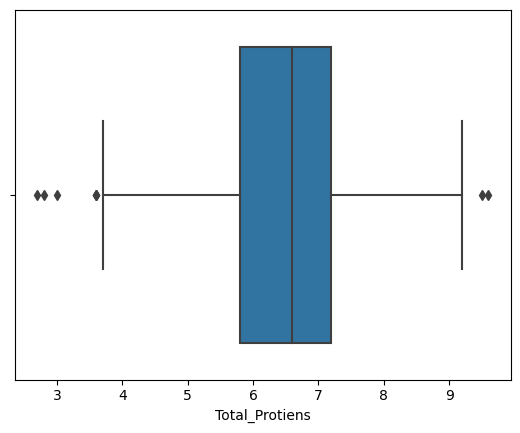

In [69]:
sns.boxplot(df.Total_Protiens) # minimum as well as max outleirs but in less amount we can change with min and max 

<AxesSubplot:xlabel='Albumin'>

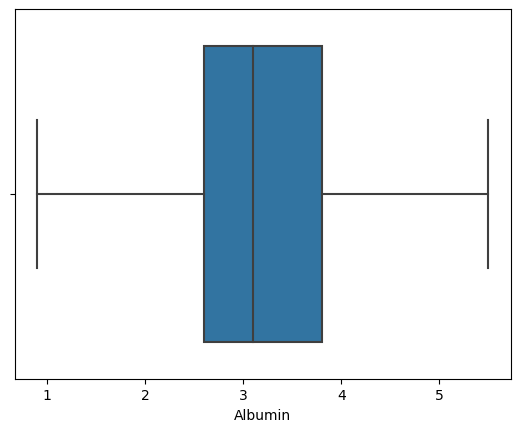

In [71]:
sns.boxplot(df.Albumin) # no outliers

In [36]:
df.describe() 


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
col=['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase']

### checking data is balanced or not 

In [36]:
df['Target'].value_counts() #  Use SMOTE ANALYSIS  after train x train ,y train only on trainig data 

1    406
0    164
Name: Target, dtype: int64

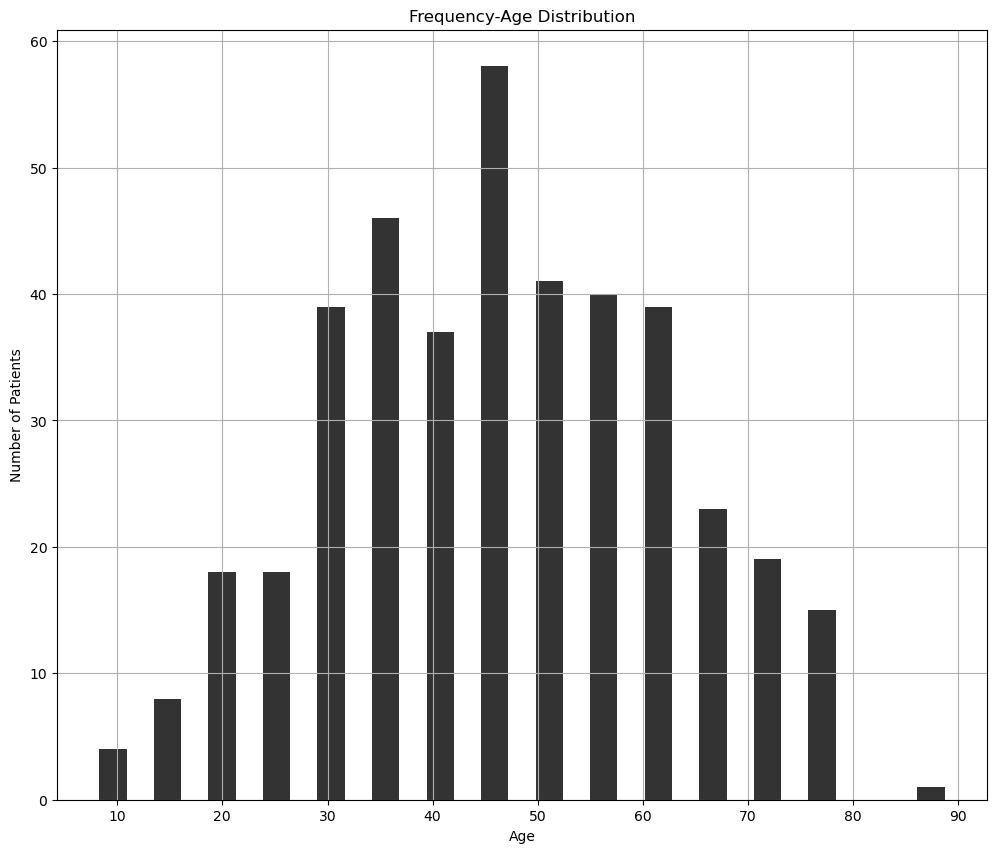

In [41]:
#Determine statistics based on age
plt.figure(figsize=(12, 10))
plt.hist(df[df['Target'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.savefig('fig1')
plt.show()

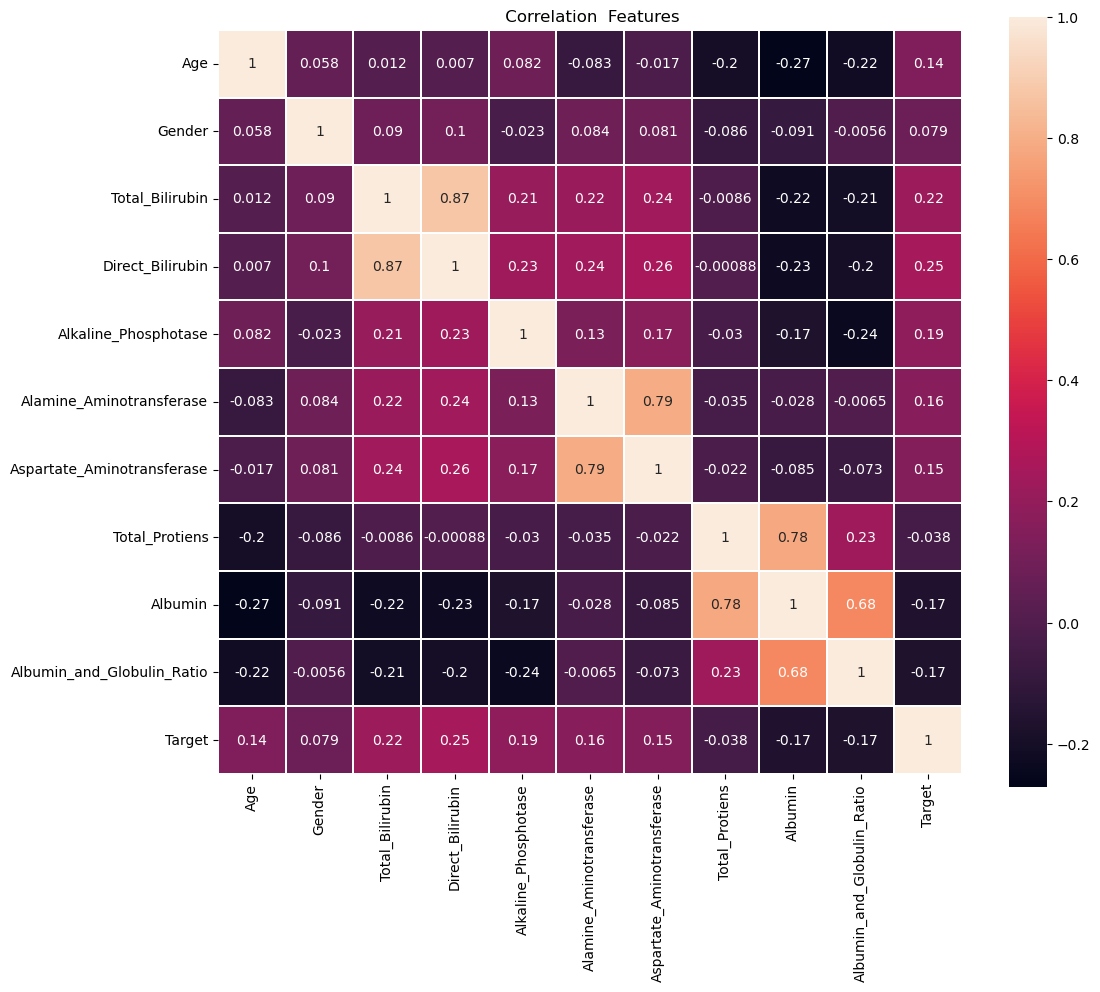

In [42]:
#correlation- 
plt.subplots(figsize=(12, 10))
plt.title(' Correlation  Features')
# Draw the heatmap using seaborn
sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

<AxesSubplot:>

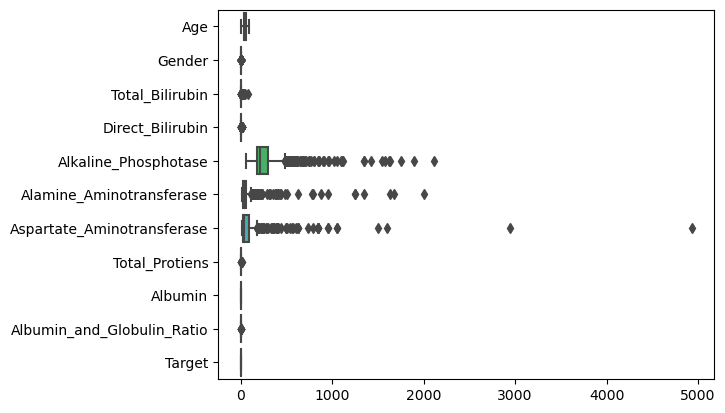

In [143]:
sns.boxplot(data=df, orient='h')

## 5. Machine learning  models 


## Scaling minmax  sampling  and SMOTE oversampling
- Scaling is applied only on indepedent features only not on target variables 
- SMOTE - only on training data
- in this project - first do smote , then scaling indepedent features 
- mean of all the features as zero and the standard deviationas is 1


In [44]:
# to split train and test set
from sklearn.model_selection import train_test_split
# import the sklearn libraries 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [38]:
# IN THIS PROJECT APPLY SMOTE THEN SCALING 
X=df.drop('Target',axis=1) # contain indepedent features 

In [39]:
y=df['Target']# contain depedennt feature only.

In [40]:
X.shape # 570 rows and 10 column 

(570, 10)

In [42]:
y.shape # 570 rows and 01 column only 

(570,)

### Split the data into test and train samples

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 40) # test size 30% 

In [54]:
X_train.shape

(399, 10)

In [55]:
X_test.shape

(171, 10)

In [56]:
y_train.shape

(399,)

In [57]:
y_test.shape

(171,)

In [48]:
# after spliting then balance the data

In [65]:
# SMOTE ANALYSIS - BALANCING DATA 
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE()

In [66]:
X_smote, y_smote = smote.fit_resample(X_train, y_train) # without scaling with smote 

In [ ]:
# SCALING - MinMaxScaler()

In [67]:
scaler = MinMaxScaler()

In [68]:
# with scaling 
X_train_scaled = scaler.fit_transform(X_smote) # only depdent features 
X_test_scaled = scaler.transform(X_test) # scaling depedent features 

In [69]:
X_train_scaled.shape

(564, 10)

In [70]:
X_test_scaled.shape

(171, 10)

In [71]:
y_smote.value_counts() # balacew the data

1    282
0    282
Name: Target, dtype: int64

## Model-1 Logistic Regression

In [72]:
lg = LogisticRegression() # first logistic regression algo 

In [76]:
lg.fit(X_smote, y_smote) # without scaling 

LogisticRegression()

In [77]:
X_smote.shape

(564, 10)

In [78]:
y_smote.shape

(564,)

In [79]:
# Logistic Regression: Using normal data
lg = LogisticRegression(C = 0.1).fit(X_smote, y_smote) # c =0.1 mostly for trained data 
print("Logistic Regression Classifier on unscaled test data:")
print("Accuracy:", lg.score(X_test, y_test))
print("Precision:", precision_score(y_test, lg.predict(X_test)))
print("Recall:", recall_score(y_test, lg.predict(X_test)))
print("F-1 score:", f1_score(y_test, lg.predict(X_test)))

Logistic Regression Classifier on unscaled test data:
Accuracy: 0.6783625730994152
Precision: 0.9259259259259259
Recall: 0.6048387096774194
F-1 score: 0.7317073170731707


In [82]:
X_train_scaled.shape

(564, 10)

In [84]:
y_smote.shape

(564,)

In [86]:
# Using feature-scaled data
lg_scaled = LogisticRegression(C = 0.1).fit(X_train_scaled, y_smote)
print("Logistic Regression Classifier on scaled test data:")
print("Accuracy:", lg_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, lg_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, lg_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, lg_scaled.predict(X_test_scaled)))

Logistic Regression Classifier on scaled test data:
Accuracy: 0.6900584795321637
Precision: 0.8317757009345794
Recall: 0.717741935483871
F-1 score: 0.7705627705627706


In [89]:
# before scaling -
lg_score = round(lg_scaled.score(X_smote, y_smote) * 100, 2)
lg_score_test = round(lg_scaled.score(X_test, y_test) * 100, 2)

In [101]:
print('Logistic Regression Training Score: ', lg_score)
print('Logistic Regression Test Score: ', lg_score_test)

Logistic Regression Training Score:  50.0
Logistic Regression Test Score:  72.51


In [102]:
# scaled score :after scaling
lg_scaled_score= round(lg_scaled.score(X_train_scaled, y_smote) * 100, 2)
lg_scaled_test= round(lg_scaled.score(X_test_scaled, y_test) * 100, 2)

In [103]:
print('Logistic Regression scaled Training Score: ',lg_scaled_score)
print('Logistic Regression scaled Test Score: ',lg_scaled_test)

Logistic Regression scaled Training Score:  65.78
Logistic Regression scaled Test Score:  69.01


In [122]:
# score on scaled data is better than unscaled data 

In [104]:
lg_predicted= lg.predict(X_test) # without scale

In [105]:
lg_scaled_predicted=lg_scaled.predict(X_test_scaled) # predicted with scale 

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:

print('Classification Report: n', classification_report(y_test,lg_predicted)) # cr of unscaled dta 

Classification Report: n               precision    recall  f1-score   support

           0       0.46      0.87      0.60        47
           1       0.93      0.60      0.73       124

    accuracy                           0.68       171
   macro avg       0.69      0.74      0.67       171
weighted avg       0.80      0.68      0.70       171



In [108]:
print('Classification Report: n', classification_report(y_test,lg_scaled_predicted)) # classification report on scaled data 

Classification Report: n               precision    recall  f1-score   support

           0       0.45      0.62      0.52        47
           1       0.83      0.72      0.77       124

    accuracy                           0.69       171
   macro avg       0.64      0.67      0.65       171
weighted avg       0.73      0.69      0.70       171



#### booth unscaled and unscaled data does not give  best score and accuracy .  
- Logistic regreession is not good for model deployment 

###  Confusion matrix -
- It represents the different combinations of Actual VS Predicted values. 
- It measures the performance of our Machine Learning classification model and looks like a table-like structure

<AxesSubplot:>

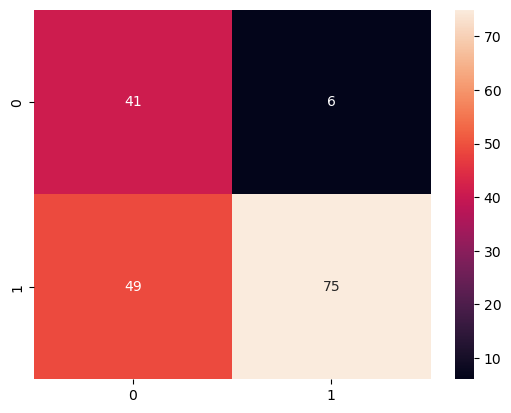

In [99]:
sns.heatmap(confusion_matrix(y_test,lg_predicted),annot=True,fmt="d")

<AxesSubplot:>

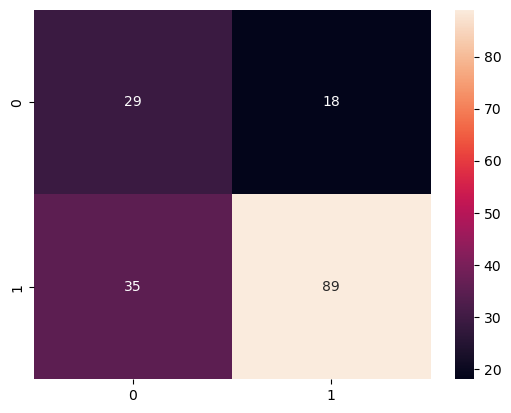

In [109]:
sns.heatmap(confusion_matrix(y_test,lg_scaled_predicted),annot=True,fmt="d")

### Model 2. Random Forest

In [114]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_smote, y_smote) # unscaled balance data


RandomForestClassifier()

In [115]:
# Predict Output
rf_predicted = random_forest.predict(X_test)


In [121]:
random_forest_score = round(random_forest.score(X_smote, y_smote) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest  training Score: ', random_forest_score)
print('Random Forest Test Score: ', random_forest_score_test)


Random Forest  training Score:  100.0
Random Forest Test Score:  69.59


In [122]:
print('Accuracy: n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Accuracy: n 0.695906432748538
[[22 25]
 [27 97]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        47
           1       0.80      0.78      0.79       124

    accuracy                           0.70       171
   macro avg       0.62      0.63      0.62       171
weighted avg       0.70      0.70      0.70       171



In [118]:
# my model random forest give high accuaracy 

In [123]:
# random forest traing and test scaled data 
rfc_scaled = RandomForestClassifier(n_estimators = 20)
rfc_scaled.fit(X_train_scaled, y_smote)

RandomForestClassifier(n_estimators=20)

In [124]:
# random forest with scaled data 

# Predict Output
rf_scale_predicted = rfc_scaled.predict(X_test_scaled)



In [129]:
# score on scaled  X_train_scaled and X_test_scaled
random_forest_scaled_score = round(rfc_scaled.score(X_train_scaled, y_smote) * 100, 2)
random_forest_scaled_score_test = round(rfc_scaled.score(X_test_scaled, y_test) * 100, 2)
print('Random Forest scaled Score: \n',random_forest_scaled_score)
print('Random Forest scaled Test Score: \n',random_forest_scaled_score_test)


Random Forest scaled Score: 
 99.47
Random Forest scaled Test Score: 
 69.59


In [130]:
# accuracy ,cm, cr on scaleed data - y test and predicted
print('Accuracy: \n', accuracy_score(y_test,rf_scale_predicted))
print(confusion_matrix(y_test,rf_scale_predicted))
print(classification_report(y_test,rf_scale_predicted))

Accuracy: 
 0.695906432748538
[[22 25]
 [27 97]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        47
           1       0.80      0.78      0.79       124

    accuracy                           0.70       171
   macro avg       0.62      0.63      0.62       171
weighted avg       0.70      0.70      0.70       171



<AxesSubplot:>

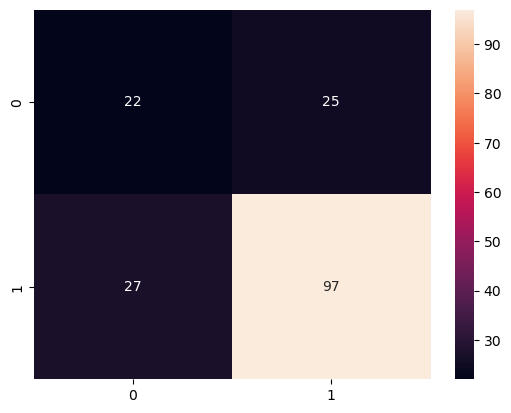

In [131]:
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d") # unscaled CM 

<AxesSubplot:>

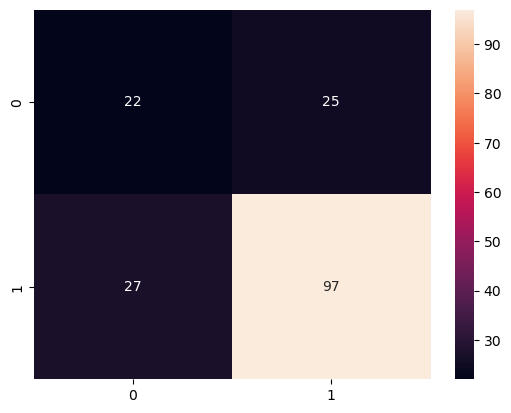

In [133]:
sns.heatmap(confusion_matrix(y_test,rf_scale_predicted),annot=True,fmt="d") # SCALED CM 

In [134]:
# Using Random forest gives best score on unscaled daata as well scaled data 

## Model 3. Gaussian Naive Bayes 
- This model is easy to build and is mostly used for large datasets. 
- It is a probabilistic machine learning model that is used for classification problems. The core of the classifier depends on the Bayes theorem with an assumption of independence among predictors. 
-That means changing the value of a feature doesn’t change the value of another feature.

- but Gaussian Naïve Bayes is used when we assume all the continuous variables associated with each feature to be distributed according to Gaussian Distribution. 
Gaussian Distribution is also called Normal distribution.

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
#GB on normal unscaled data
gs = GaussianNB()
gs.fit(X_smote, y_smote)


GaussianNB()

In [138]:
# Gaussian Naive Bayes on first unscaled data 
# Predict Output
gs_predicted = gs.predict(X_test)

In [176]:
# score gaussian on unscaled data 
gs_score = round(gs.score(X_smote, y_smote) * 100, 2)
gs_score_test = round(gs.score(X_test, y_test) * 100, 2)

In [177]:
print('Gaussian Score: n', gs_score)
print('Gaussian Test Score: n',gs_score_test)
print('Accuracy: n', accuracy_score(y_test, gs_predicted))
print(confusion_matrix(y_test,gs_predicted))
print(classification_report(y_test,gs_predicted))

Gaussian Score: n 67.55
Gaussian Test Score: n 54.97
Accuracy: n 0.5497076023391813
[[46  1]
 [76 48]]
              precision    recall  f1-score   support

           0       0.38      0.98      0.54        47
           1       0.98      0.39      0.55       124

    accuracy                           0.55       171
   macro avg       0.68      0.68      0.55       171
weighted avg       0.81      0.55      0.55       171



In [141]:
#  Gaussian Naive Bayes model create of scaled data
gss = GaussianNB()
gss.fit(X_train_scaled, y_smote)

GaussianNB()

In [142]:
#  Gaussian Naive Bayes on first scaled data 
gs_scale_predicted = gss.predict(X_test_scaled)

In [174]:
 # score gaussian on scaled data 
gs_s_score = round(gss.score(X_train_scaled, y_smote) * 100, 2)
gs_s_score_test = round(gss.score(X_test_scaled, y_test) * 100, 2)

In [175]:
print('Gaussian scaled Score: n', gs_s_score) # scaled score 
print('Gaussian scaled Test Score: n', gs_s_score_test) # scaled test score 
print('Accuracy scaled : n', accuracy_score(y_test, gs_scale_predicted))
print(confusion_matrix(y_test,gs_scale_predicted))
print(classification_report(y_test,gs_scale_predicted))

Gaussian scaled Score: n 67.55
Gaussian scaled Test Score: n 54.97
Accuracy scaled : n 0.5497076023391813
[[46  1]
 [76 48]]
              precision    recall  f1-score   support

           0       0.38      0.98      0.54        47
           1       0.98      0.39      0.55       124

    accuracy                           0.55       171
   macro avg       0.68      0.68      0.55       171
weighted avg       0.81      0.55      0.55       171



<AxesSubplot:>

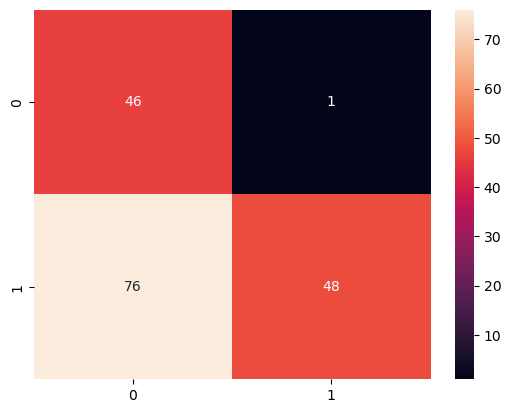

In [144]:
# confusion matrix -unscaled data  
sns.heatmap(confusion_matrix(y_test,gs_predicted),annot=True,fmt="d") 

<AxesSubplot:>

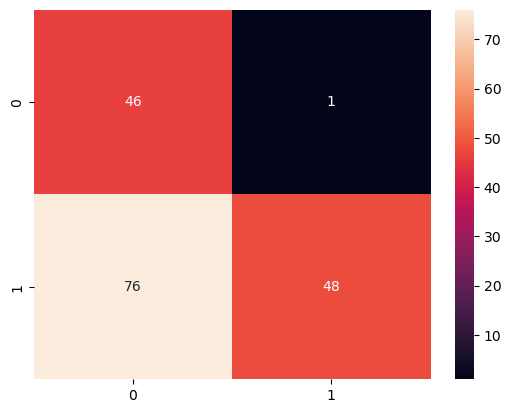

In [145]:
# confusion matrix -scaled data 
sns.heatmap(confusion_matrix(y_test,gs_scale_predicted),annot=True,fmt="d") # 

## Model 4. Support vector machine 
-SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones.
-Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks,
- but generally, they work best in classification problems .
- It is a supervised machine learning problem where we try to find a hyperplane that best separates the two classes.
-main difference is logistic regression is a probabilistic approach 
whereas support vector machine is based on statistical approaches.
- hard and soft svm . used soft  svm 

In [147]:
#SVM Classifier with RBF kernel: Using normal data
svc = SVC(C = 0.1, kernel = 'rbf').fit(X_smote, y_smote)
print("SVM Classifier on unscaled test data:")


SVM Classifier on unscaled test data:


In [148]:
print("Accuracy:", svc.score(X_test, y_test))
print("Precision:", precision_score(y_test, svc.predict(X_test)))
print("Recall:", recall_score(y_test, svc.predict(X_test)))
print("F-1 score:", f1_score(y_test, svc.predict(X_test)))

Accuracy: 0.49122807017543857
Precision: 0.9302325581395349
Recall: 0.3225806451612903
F-1 score: 0.47904191616766467


In [149]:
#Predict Output on unscaled data 
svc_predicted= svc.predict(X_test)
# score on unscaled data of svm 
svc_score = round(svc.score(X_smote, y_smote) * 100, 2)
svc_score_test = round(svc.score(X_test, y_test) * 100, 2)

In [104]:
 
# Equation coefficient and Intercept
print('SVM Training Score: n', svc_score)
print('SVM Test Score: n', svc_score_test)
print('Accuracy: n', accuracy_score(y_test,svc_predicted))
print('Confusion Matrix: n', confusion_matrix(y_test,svc_predicted))
print('Classification Report: n', classification_report(y_test,svc_predicted))

SVM Training Score: n 70.96
SVM Test Score: n 72.03
Accuracy: n 0.7202797202797203
Confusion Matrix: n [[  0  40]
 [  0 103]]
Classification Report: n               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



In [150]:
#Using scaled data
svc_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_smote)


In [151]:
#Predict Output on scaled data 
svc_s_predicted= svc_scaled.predict(X_test_scaled)

In [152]:
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, svc_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, svc_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, svc_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 0.5964912280701754
Precision: 0.8313253012048193
Recall: 0.5564516129032258
F-1 score: 0.6666666666666666


<AxesSubplot:>

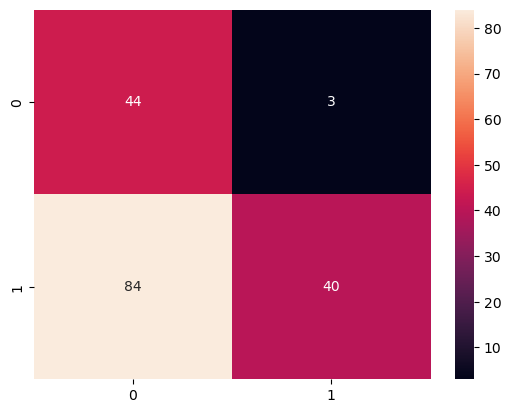

In [153]:
# confusion matrix of normal data 
sns.heatmap(confusion_matrix(y_test,svc_predicted),annot=True,fmt="d") 

<AxesSubplot:>

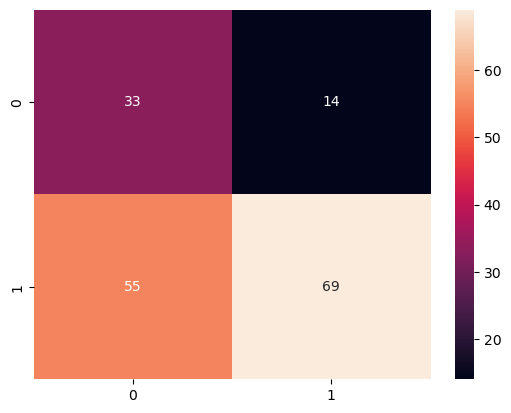

In [154]:
# confusion matrix of scaled data 
sns.heatmap(confusion_matrix(y_test,svc_s_predicted),annot=True,fmt="d") 

## Model 5. Descision tree:
- It is a graphical representation of all possible solutions to a decision 
- it is used in both regression and classification problem 
- When it is used in classification - when target or dependent varaible is categorical and in regression it is continous varaible. 

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
# Build and train model on normal unscaled data
dt= DecisionTreeClassifier()
dt.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [158]:
# Apply model to validation or test data
y_predict = dt.predict(X_test)

In [159]:

print('Classification Report: n', classification_report(y_test,y_predict))

Classification Report: n               precision    recall  f1-score   support

           0       0.34      0.43      0.38        47
           1       0.76      0.69      0.72       124

    accuracy                           0.61       171
   macro avg       0.55      0.56      0.55       171
weighted avg       0.64      0.61      0.63       171



In [160]:
print('Confusion Matrix: n', confusion_matrix(y_test,y_predict))

Confusion Matrix: n [[20 27]
 [39 85]]


<AxesSubplot:>

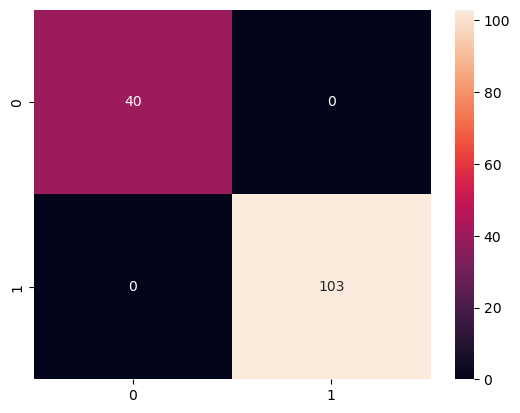

In [157]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt="d") # UNSCALED DATA

In [170]:
# decision tree on scaled data
d= DecisionTreeClassifier()
d.fit(X_train_scaled, y_smote)
      

DecisionTreeClassifier()

In [171]:
y_predict1 = d.predict(X_test_scaled)

In [172]:
print('Classification Report: n', classification_report(y_test,y_predict1))

Classification Report: n               precision    recall  f1-score   support

           0       0.32      0.38      0.35        47
           1       0.75      0.69      0.71       124

    accuracy                           0.60       171
   macro avg       0.53      0.53      0.53       171
weighted avg       0.63      0.60      0.61       171



<AxesSubplot:>

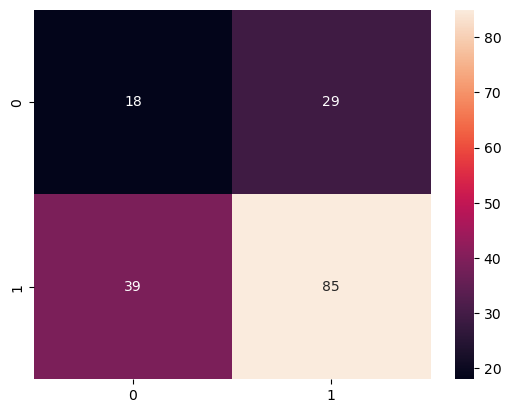

In [173]:
sns.heatmap(confusion_matrix(y_test,y_predict1),annot=True,fmt="d") # SCALED DATA

# Conclusions of the above 5  algorithms - 
- From the Models (Logistic Regression, Gaussian Naive Bayes, Random Forest,Support Vector Machine  and Decision tree)
-Random forest & Decision tree  perform the best on this dataset. 
- Logistic Regression perform betteris  on scaled data.
- according to above model training Decisiobn tree is good for unscaled data 
- and logistic regression is good for scaled data 